In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_style("whitegrid")

In [11]:
def make3(init):
    return [init + 3*i for i in range(10)]

# 使用惠斯通电桥测量铜电阻

In [12]:
def b_bridge(Us, R1, R2, _R3_l, _t_l):
    alpha_0 = 0.00428
    K = R1 / R2
    R3_l = np.array(_R3_l)
    Rx_l = R3_l * K
    t_l = np.array(_t_l)
    item_list = [t_l, R3_l, Rx_l]
    item_name = ['温度', 'R_3测量值', 'R_x计算值']
    print("数据", end='\t')
    for e in item_name:
        print(e, end='\t    ')
    print('', end='\n')
    
    print('---------------------------------------------------------------------------------------------------------------')
    for i in range(t_l.shape[0]):
        print("#%d" % i, end='\t')
        for ll in item_list:
            print("%.2f" % ll[i], end='\t    ')
        print('\n', end='')
    print('---------------------------------------------------------------------------------------------------------------')
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['figure.dpi'] = 144
    plt.scatter(t_l, Rx_l, color='black')
    A = np.vstack([t_l, np.ones(len(t_l))]).T
    m, c = np.linalg.lstsq(A, np.array(Rx_l), rcond=1)[0]
    alpha = m / c
    print("R = %.4ft + %.3f" % (m, c))
    print("R = %.3f * (1 + %ft)" % (c, alpha))
    print("不确定度 U_alpha = %.1f%%" % ((np.abs(alpha - alpha_0) * 100 / alpha_0)))
    plt.plot(t_l, m * t_l + c, linewidth=2, color='black', linestyle='--')

**请将数据放入字典对象`b_data`中**

参数解释:
1. `Us` :平衡电压
2. `R1` : R1阻值
3. `R2` : R2阻值
4. `_R3_l` : R3测量值数列
5. `_t_l` : 温度T测量值数列,温度T测量值数列,若时间差恒为3,可使用`make3(你的初始时间)`,例如`make3(34.0)`


数据	温度	    R_3测量值	    R_x计算值	    
---------------------------------------------------------------------------------------------------------------
#0	32.00	    572.21	    57.22	    
#1	35.00	    578.51	    57.85	    
#2	38.00	    585.00	    58.50	    
#3	41.00	    590.90	    59.09	    
#4	44.00	    597.10	    59.71	    
#5	47.00	    603.50	    60.35	    
#6	50.00	    609.80	    60.98	    
#7	53.00	    616.10	    61.61	    
#8	56.00	    622.40	    62.24	    
#9	59.00	    628.60	    62.86	    
---------------------------------------------------------------------------------------------------------------
R = 0.2088t + 50.543
R = 50.543 * (1 + 0.004130t)
不确定度 U_alpha = 3.5%


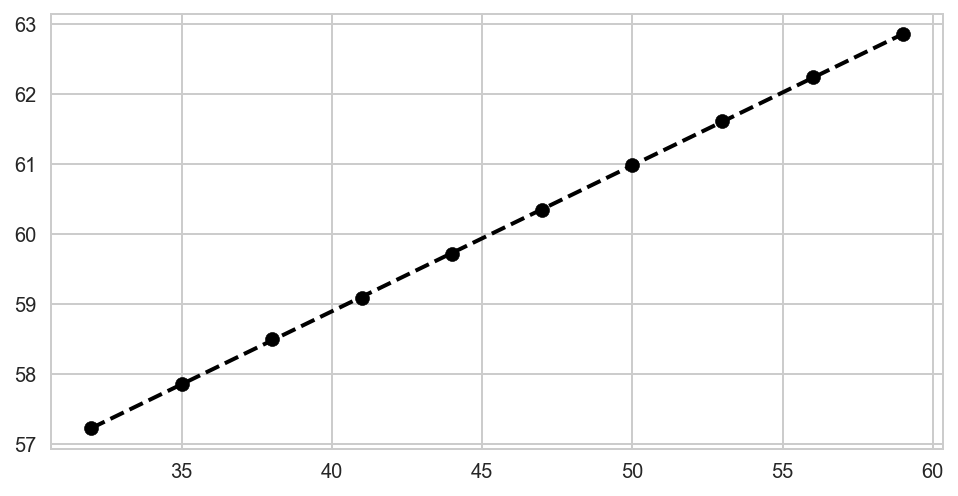

In [14]:
b_data = {
    'Us'    : 5, 
    'R1'    : 100,
    'R2'    : 1000,
    '_R3_l' : [572.21,578.51,585.00,590.90,597.10,603.50,609.80,616.10,622.40,628.60], 
    '_t_l'  : make3(32)
}
b_bridge(**b_data)

# 使用卧式电桥测量铜电阻

In [15]:
def l_bridge(Us, R2, R3, R1_0, _t_l, _U_l):
    alpha_0 = 0.00428
    t_l = np.array(_t_l)
    U_l = np.array(_U_l)
    d_Rx = 4 * R1_0 * U_l * 10**-3 / Us
    Rx_l = np.round(R1_0 + d_Rx, 2)
    item_list = [t_l, U_l, d_Rx, Rx_l]
    item_name = ['温度', '电压测量值', 'delta_R_x', 'R_x计算值']
    print("数据", end='\t')
    for e in item_name:
        print(e, end='\t    ')
    print('', end='\n')
    
    print('---------------------------------------------------------------------------------------------------------------')
    for i in range(t_l.shape[0]):
        print("#%d" % i, end='\t')
        for ll in item_list:
            print("%.2f" % ll[i], end='\t    ')
        print('\n', end='')
    print('---------------------------------------------------------------------------------------------------------------')
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['figure.dpi'] = 144
    plt.scatter(t_l, Rx_l, color='black')
    A = np.vstack([t_l, np.ones(len(t_l))]).T
    m, c = np.linalg.lstsq(A, np.array(Rx_l), rcond=1)[0]
    alpha = m / c
    print("R = %.4ft + %.3f" % (m, c))
    print("R = %.3f * (1 + %ft)" % (c, alpha))
    print("R_0 = %.3f, alpha = %f" % (c, alpha))
    print("不确定度 U_alpha = %.1f%%" % ((np.abs(alpha - alpha_0) * 100 / alpha_0)))
    plt.plot(t_l, m * t_l + c, linewidth=2, color='black', linestyle='--')

**请将数据放入字典对象`l_data`中**

参数解释:
1. `Us` :平衡电压
2. `R2` : R2阻值
3. `R3` : R3阻值
4. `R1_0` : R1初始测量值
5. `_t_l` : 温度T测量值数列,温度T测量值数列,若时间差恒为3,可使用`make3(你的初始时间)`,例如`make3(34.0)`
6. `_U_l` : 电压测量值数列


数据	温度	    电压测量值	    delta_R_x	    R_x计算值	    
---------------------------------------------------------------------------------------------------------------
#0	30.00	    0.00	    0.00	    56.46	    
#1	33.00	    3.30	    0.57	    57.03	    
#2	36.00	    6.80	    1.18	    57.64	    
#3	39.00	    10.30	    1.79	    58.25	    
#4	42.00	    13.70	    2.38	    58.84	    
#5	45.00	    17.10	    2.97	    59.43	    
#6	48.00	    20.50	    3.56	    60.02	    
#7	51.00	    23.90	    4.15	    60.61	    
#8	54.00	    27.20	    4.73	    61.19	    
#9	57.00	    30.40	    5.28	    61.74	    
---------------------------------------------------------------------------------------------------------------
R = 0.1967t + 50.562
R = 50.562 * (1 + 0.003891t)
R_0 = 50.562, alpha = 0.003891
不确定度 U_alpha = 9.1%


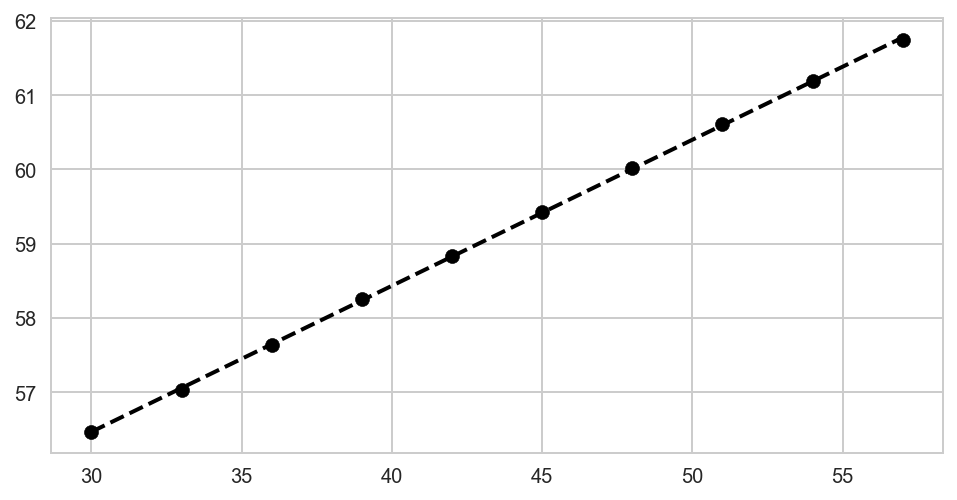

In [16]:
l_data = {
    'Us'   : 1.3,
    'R2'   : 50,
    'R3'   : 50,
    'R1_0' : 56.46,
    '_t_l' : make3(30),
    '_U_l' : [0,3.3,6.8,10.3,13.7,17.1,20.5,23.9,27.2,30.4]
}
l_bridge(**l_data)

# 使用立式电桥测量热敏电阻

In [18]:
def s_bridge(Us, R1, R2, R3_0, _t_l, _U_l):
    t_l = np.array(_t_l)
    U_l = np.array(_U_l)
    R_ = R1
    R = R3_0
    d_Rx = ((R+R_)**2 * U_l * 10**-3) / (R_*Us - (R+R_)*U_l*10**-3)
    Rx_l = np.round(R3_0 + d_Rx, 2)
    tr_Rx_l = np.log(Rx_l)
    T_l = t_l + 273
    tr_T_l = 1 / T_l
    item_list = [t_l, U_l, d_Rx, Rx_l, T_l, tr_Rx_l, tr_T_l]
    item_name = ['温度', '电压测量值', 'delta_R_x', 'R_x计算值','T(=t+273)', 'ln(R_x)', '1/T']
    print("数据", end='\t')
    for e in item_name:
        print(e, end='\t    ')
    print('', end='\n')
    
    print('---------------------------------------------------------------------------------------------------------------')
    for i in range(t_l.shape[0]):
        print("#%d" % i, end='\t')
        for ll in item_list[:-2]:
            print("%.2f" % ll[i], end='\t    ')
        print("%.4f" % item_list[-2][i], end='\t    ')
        print("%.6f" % item_list[-1][i], end='\t    ')
        print('\n', end='')
    print('---------------------------------------------------------------------------------------------------------------')
    plt.rcParams['figure.figsize'] = [8, 8]
    plt.rcParams['figure.dpi'] = 144
    plt.subplot(211)
    plt.scatter(T_l, Rx_l, color='black')
    plt.plot(T_l, Rx_l, color='black', linestyle='-')
    plt.subplot(212)
    L = tr_T_l.min()
    H = tr_T_l.max()
    d = (H - L) / 10
    plt.xlim(L - d, H + d)
    plt.scatter(tr_T_l, tr_Rx_l, color='black')
    A = np.vstack([tr_T_l, np.ones(len(tr_T_l))]).T
    m, c = np.linalg.lstsq(A, np.array(tr_Rx_l), rcond=1)[0]
    plt.plot(tr_T_l, m * tr_T_l + c, linewidth=2, color='black', linestyle='--')
    print("ln(R_x) = %.1f * (1/T) + (%.4f)" % (m, c))
    R_0 = np.exp(c)
    B_n = m
    print("R_x = R_0 * e^(B_n/T) = %.3f * e^(%.1f/T)" % (R_0, B_n))
    print("R_0 = %.3f, B_n = %.1f" % (R_0, B_n))

**请将数据放入字典对象`l_data`中**

参数解释:
1. `Us` :平衡电压
2. `R1` : R1阻值
3. `R2` : R2阻值
4. `R3_0` : R3初始测量值
5. `_t_l` : 温度T测量值数列,若时间差恒为3,可使用`make3(你的初始时间)`,例如`make3(34.0)`
6. `_U_l` : 电压测量值数列


数据	温度	    电压测量值	    delta_R_x	    R_x计算值	    T(=t+273)	    ln(R_x)	    1/T	    
---------------------------------------------------------------------------------------------------------------
#0	28.00	    0.00	    0.00	    2510.30	    301.00	    7.8282	    0.003322	    
#1	31.00	    -5.00	    -238.15	    2272.15	    304.00	    7.7285	    0.003289	    
#2	34.00	    -10.70	    -461.64	    2048.66	    307.00	    7.6249	    0.003257	    
#3	37.00	    -17.00	    -664.27	    1846.03	    310.00	    7.5208	    0.003226	    
#4	40.00	    -23.90	    -846.46	    1663.84	    313.00	    7.4169	    0.003195	    
#5	43.00	    -31.40	    -1009.37	    1500.93	    316.00	    7.3138	    0.003165	    
#6	46.00	    -39.50	    -1154.58	    1355.72	    319.00	    7.2121	    0.003135	    
#7	49.00	    -48.20	    -1283.81	    1226.49	    322.00	    7.1119	    0.003106	    
#8	52.00	    -56.90	    -1391.96	    1118.34	    325.00	    7.0196	    0.003077	    
#9	55.00	    -66.90	    -1496.36	    1013.94	    328.0

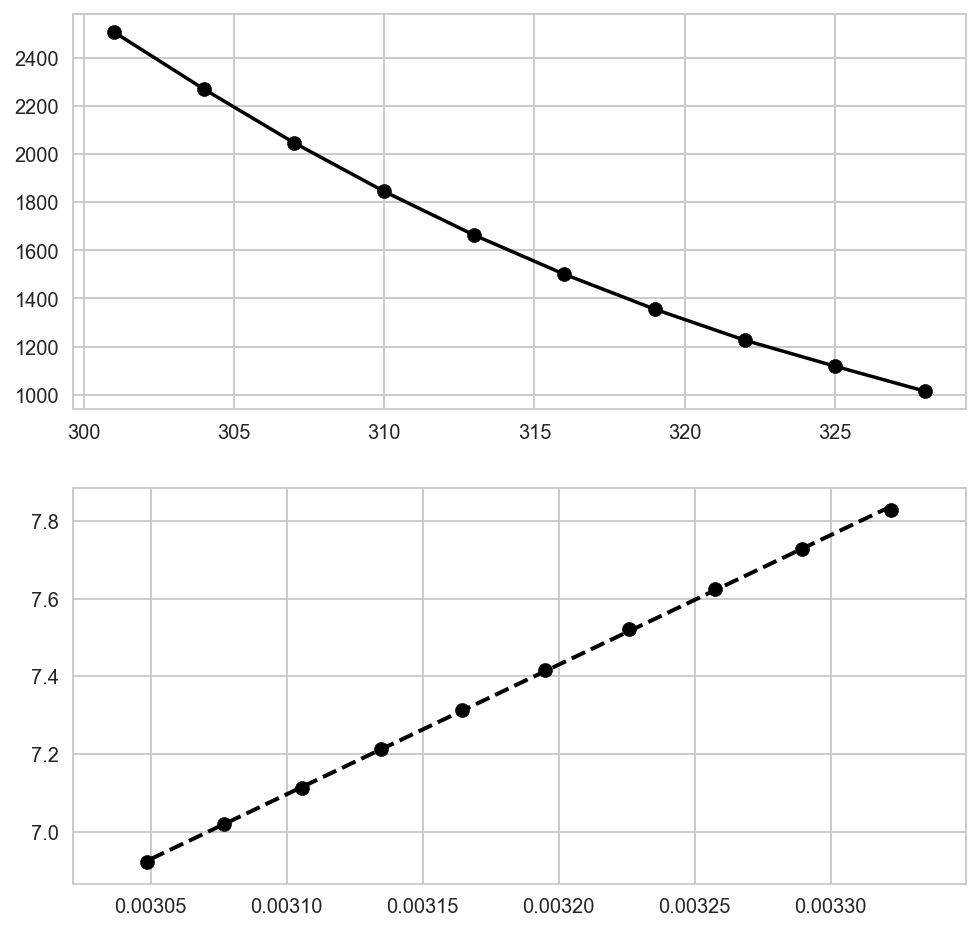

In [20]:
s_data = {
    'Us'   : 1.3, 
    'R1'   : 100, 
    'R2'   : 100, 
    'R3_0' : 2510.3, 
    '_t_l' : make3(28), 
    '_U_l' : [0,-5,-10.7,-17.0,-23.9,-31.4,-39.5,-48.2,-56.9,-66.9]
}
s_bridge(**s_data)